In [1]:
import math
import scipy.special as sc
import matplotlib.pyplot as plt
import numpy as np
import random
import itertools as itt

0. Бросается игральный кубик. Найти вероятность того, что выпадет цифра 3 и 
доказать статистическую устойчивость этого события.

In [2]:
print('P(A)=',1/6)

P(A)= 0.16666666666666666


In [3]:
def stat_probability(N):
    M=0
    for i in range(N):
        if random.randint(1,7)==3:
            M+=1
    return M/N 

In [4]:
def plot_stat_probability(N):
    x=list(range(1,N+1))
    y=[stat_probability(num) for num in x]
    plt.plot(x,y,color='r')
    plt.xlabel('Количество испытаний')
    plt.ylabel('Вероятность')
    plt.title('Статистическая вероятность выпадения цифры 3')
    plt.ylim(0,1)
    plt.grid(True)
    plt.show()

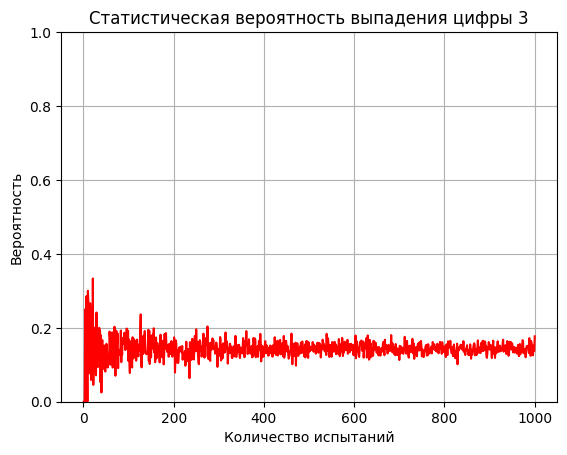

In [7]:
num_experiments=1000
plot_stat_probability(num_experiments)

1. В ящике находится 3 белых и 4 черных шара. Найдите вероятность того, что из 
двух вынутых наудачу шаров один белый, а другой черный. Вынутый шар в урну 
не возвращается. Решить с помощью имитационного моделирования на Python
и сравнить результат с теоретическим

A - из двух вынутых наудачу шаров один белый, а другой черный.

P(A) - ?

n=C_7^2

m=C_3^1*C_4^1

P(A)=m/n

In [8]:
n=sc.comb(7,2)
m=sc.comb(3,1)*sc.comb(4,1)
print('P(A)=',m/n)

P(A)= 0.5714285714285714


A_1 - 1 б, 1 ч

А_2 - 1 ч, 1 б

A=A_1+A_2

In [9]:
print('P(A)=', 3/7* 4/6+4/7*3/6)

P(A)= 0.5714285714285714


In [10]:
# С помощью имитационного моделирования

In [11]:
def cross(A,B):
    return{a+b
          for a in A for b in B}

In [12]:
urn=cross('W','123')|cross('B','1234')
urn

{'B1', 'B2', 'B3', 'B4', 'W1', 'W2', 'W3'}

In [13]:
def combos(item,n):
    return{''.join(combo)
          for combo in itt.combinations(item,n)}

In [14]:
urn2=combos(urn,2)
urn2

{'B1W1',
 'B1W2',
 'B1W3',
 'B2B1',
 'B2B3',
 'B2B4',
 'B2W1',
 'B2W2',
 'B2W3',
 'B3B1',
 'B3B4',
 'B3W1',
 'B3W2',
 'B3W3',
 'B4B1',
 'B4W1',
 'B4W2',
 'B4W3',
 'W1W2',
 'W1W3',
 'W3W2'}

In [15]:
sc.comb(7,2)

21.0

In [16]:
len(urn2)

21

In [18]:
urn2=list(urn2)

In [21]:
N=1000
M=0
for i in range(N):
    wb={s for s in random.sample(urn2,1) if s.count('B')==1 and s.count('W')==1}
    if len(wb)==1:
        M+=1

In [22]:
print('P_stat(A)=',M/N)

P_stat(A)= 0.574


2. В группе учатся 13 юношей и 9 девушек. Для дежурства случайным образом 
отобраны три студента. Найдите вероятность того, что все дежурные окажутся 
юношами.

In [23]:
n = sc.comb(22, 3)
m = sc.comb(13, 3)
print(m/n)

0.18571428571428572


In [43]:
n = 1000000
m = 0
for i in range(n):
    num = set()
    while len(num) < 3:
        num.add(random.randint(1, 23))
    bL = [el <= 13 for el in num]
    if all(bL):
        m+= 1
print(m/n)

    

0.161631


In [44]:
def check(n):
    c = 0
    l = ['m' for i in range(13)] + ['d' for i in range(9)]
    for i in range(n):
        if ['m', 'm', 'm'] == random.sample(l, 3):
            c += 1
    return c/n

In [46]:
def plot_check(N):
    x=list(range(1,N+1))
    y=[check(num) for num in x]
    plt.plot(x,y,color='r')
    plt.xlabel('Количество испытаний')
    plt.ylabel('Вероятность')
    plt.title('Статистическая вероятность ')
    plt.ylim(0,1)
    plt.grid(True)
    plt.show()

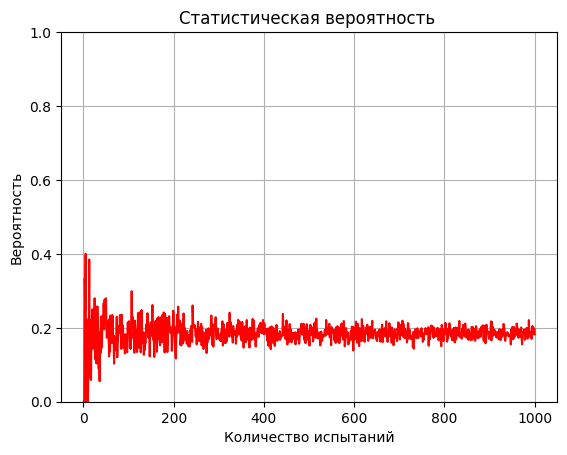

In [47]:
plot_check(1000)

In [48]:
check(1000)

0.186

Независимо друг от друга 5 человек садятся в поезд, содержащий 13 вагонов. 
Найдите вероятность того, что все они поедут в разных вагонах.


In [49]:
n = 13 ** 5
m = 13 * 12 * 11 * 10 * 9
print(m/n)

0.4159518224151815


In [62]:
def check(n):
    c = 0
    for i in range(n):
        m = np.random.randint(1, 14, size = 5)
        if len(set(m)) == 5:
            c += 1
    return c/n

check(1000)

0.442

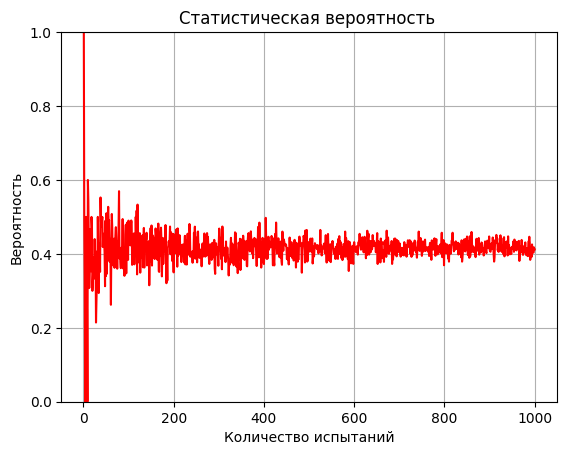

In [60]:
def plot_check(N):
    x=list(range(1,N+1))
    y=[check(num) for num in x]
    plt.plot(x,y,color='r')
    plt.xlabel('Количество испытаний')
    plt.ylabel('Вероятность')
    plt.title('Статистическая вероятность ')
    plt.ylim(0,1)
    plt.grid(True)
    plt.show()
    
plot_check(1000)

В киоске продается 9 лотерейных билетов, из которых число выигрышных 
составляет 3 штуки. Прохожий купил 5 билетов. Какова вероятность того, что 
число выигрышных среди них будет не меньше одного?

In [63]:
n = sc.comb(9, 5)
m = sc.comb(6, 5)
1 - m/n

0.9523809523809523

In [68]:
def win(N):
    c = 0
    l = ['w' for i in range(3)] + ['f' for i in range(6)]
    for i in range(N):
        if ['f', 'f', 'f', 'f', 'f'] == random.sample(l, 5):
            c += 1
    return 1 - c/N


In [70]:
win(10000)

0.9491

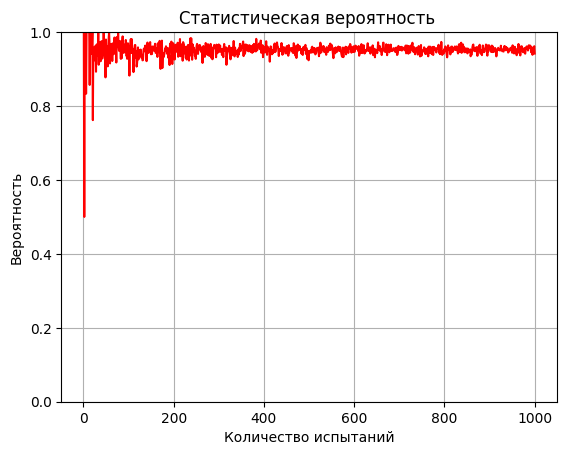

In [71]:
def plot_check(N):
    x=list(range(1,N+1))
    y=[win(num) for num in x]
    plt.plot(x,y,color='r')
    plt.xlabel('Количество испытаний')
    plt.ylabel('Вероятность')
    plt.title('Статистическая вероятность ')
    plt.ylim(0,1)
    plt.grid(True)
    plt.show()
    
plot_check(1000)

В партии из 13 деталей имеется 8 стандартных. Наудачу отобраны 7 деталей. 
Найдите вероятность того, что среди отобранных деталей ровно 5 стандартных

In [73]:
n = sc.comb(13, 7)
m = sc.comb(8, 5) * sc.comb(5, 2)
m/n

0.32634032634032634

In [89]:
def win(N):
    c = 0
    l = ['f' for i in range(8)] + ['w' for i in range(5)]
    for i in range(N):
        if random.sample(l, 7).count('f') == 5:
            c += 1
    return c/N

In [91]:
win(10000)

0.3269

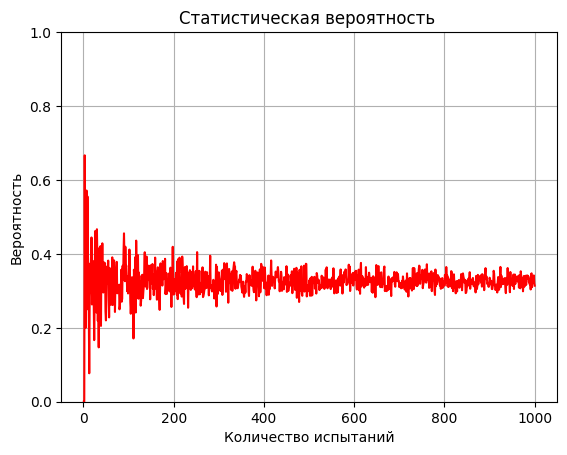

In [94]:
def plot_check(N):
    x=list(range(1,N+1))
    y=[win(num) for num in x]
    plt.plot(x,y,color='r')
    plt.xlabel('Количество испытаний')
    plt.ylabel('Вероятность')
    plt.title('Статистическая вероятность ')
    plt.ylim(0,1)
    plt.grid(True)
    plt.show()
    
plot_check(1000)